In [79]:
%matplotlib inline

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import re

In [81]:
# get loandata
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [82]:
# clean interest rate using regex - ability to replace so df objects are mutable
loansData['Interest.Rate'] = [float(re.search('^[0-9]*.[0-9]*',loan).group(0))/100 for loan in loansData['Interest.Rate']]


In [83]:
# clean fico range and get score 
loansData['FICO.Score'] = map(lambda x: int(x.split('-')[0]), loansData['FICO.Range'])

In [84]:
### create datasets for 10k and 30k regression lines

In [85]:
data10k = loansData[loansData['Amount.Requested'] == 10000]  ## Talk to Kyle about proper referencing here.

In [86]:
data10k.shape

(206, 15)

In [87]:
data30k = loansData[loansData['Amount.Requested'] == 30000] 

In [88]:
# function to calculate the least squares function for different datasets
def get_ols(data):
    # extract the columns from the data frame returning a series
    intrate = loansData['Interest.Rate']
    loanamt = loansData['Amount.Requested']
    fico = loansData['FICO.Score']

    # reshape the data
    # The dependent variable
    y = np.matrix(intrate).transpose()
    # The independent variables shaped as columns
    x1 = np.matrix(fico).transpose()
    x2 = np.matrix(loanamt).transpose()

    # put the columns back together to create a matrix
    x = np.column_stack([x1,x2])

    # create the linear model with statsmodels - # read more about stats models
    X = sm.add_constant(x)
    model = sm.OLS(y,X)
    f = model.fit()

#     f.params  # get the parms for the calculation y = m + a(x) + b(x)

#     # show the output
#     f.summary()

    return(f, x1)

C:\Users\bob071988\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


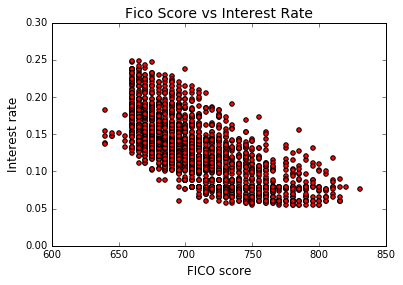

In [90]:
# It's much more convenient to just use pyplot's factory functions...
fig, ax = plt.subplots()

ax.set_title("Fico Score vs Interest Rate",fontsize=14)
ax.set_xlabel("FICO score",fontsize=12)
ax.set_ylabel("Interest rate",fontsize=12)

plt.scatter(loansData['FICO.Score'],loansData['Interest.Rate'], c='red')

get_ols(data10k)
# xdata = data10k['FICO.Score'] # just had get_ols return fico which is already shaped.
# xdata = xdata.tolist()
data10k['ydata'] = [(data10k['FICO.Score'] * f.params[0] + f.params[1]) for index, loan in data10k.iterrows()]
ydatatemp = data10k['ydata']
ydata = np.matrix(ydatatemp).transpose()
# x2 = np.matrix(loanamt).transpose()
# ydata = ydata.tolist()
# plt.plot(x1, ydata, c = 'yellow')

In [91]:
type(x1)

numpy.matrixlib.defmatrix.matrix

In [92]:
x1.shape, ydata.shape

((206L, 1L), (206L, 1L))

In [93]:
x1[:5]

matrix([[695],
        [720],
        [695],
        [730],
        [665]], dtype=int64)

In [94]:
ydata[:5]

matrix([[ 15825    -0.541842
 48808    -0.561335
 62127    -0.541842
 44987    -0.569132
 61703    -0.518450
 67158    -0.526247
 103405   -0.526247
 82476    -0.537943
 85644    -0.565234
 85686    -0.526247
 20263    -0.580828
 2633     -0.573031
 103874   -0.553538
 96988    -0.534045
 53897    -0.534045
 42319    -0.541842
 4168     -0.615916
 28402    -0.557437
 42222    -0.522349
 28534    -0.549639
 84283    -0.530146
 8549     -0.569132
 68413    -0.541842
 39439    -0.518450
 61683    -0.534045
 71743    -0.537943
 25426    -0.573031
 48235    -0.576930
 22993    -0.573031
 50602    -0.588626
             ...   
 72766    -0.526247
 4843     -0.612017
 8626     -0.549639
 12248    -0.619815
 80198    -0.545741
 41741    -0.537943
 93711    -0.522349
 12429    -0.530146
 45644    -0.565234
 56391    -0.522349
 88584    -0.518450
 95536    -0.514552
 53930    -0.522349
 91702    -0.541842
 59807    -0.530146
 26914    -0.608119
 43527    -0.537943
 6712     -0.545741
 42148    -

In [ ]:
type(ydata)

In [ ]:
ydata.shape

In [ ]:
type(xdata)

In [ ]:
type(fico)

In [ ]:
type(ydata)

In [ ]:
type(ydata[:1])

In [ ]:
ydata[:1][0][0]

In [ ]:
type(ydata)

In [ ]:
type(xdata)

In [ ]:
test1 = xdata.tolist()

In [ ]:
type(test1)

In [ ]:
test1[:8]


In [ ]:
f.summary()

In [ ]:
f.params

In [ ]:
f.params

In [ ]:
# # generate the data for the 10k line
# ydata10k = []
# xdata10k = []
# for index, row in data10k.iterrows():
#     ydata10k.append(f10k.params[0] + row['FICO.Score'] * f10k.params[1] + row['Interest.Rate'] * f10k.params[2])
# #     print(row['FICO.Score'], row['Interest.Rate'])
# #     xtemp = row['FICO.Score'].tolist()
#     xdata10k.append(row['FICO.Score'])

In [ ]:
# loansData10k = [loansData for loan in (loansData['Amount.Requested'] == 10000)] # tried this to get just 10k but creats a list not a df


In [ ]:
type(loansData10k)

In [ ]:
# loansData.drop('Home.Ownership')

In [ ]:
# data = data[data.population != 'sibling']

In [ ]:
type(data10k)

In [ ]:
data10k.shape

In [ ]:
# loansData['testfico'] = [loansData['FICO.Score'] for loan in loansData['Interest.Rate']] didn't work got multiple values in testfico

In [ ]:
type(loansData)

In [ ]:
# df[df.a > df.b]  # same result as the previous expression

In [ ]:
# loansData[loansData.testfico.any() > 100] does not work

In [ ]:
row1 = loansData[100:101] # grab a data point for the line

In [ ]:
row2 = loansData[200:201] # grab a second data point for the line

In [ ]:
# Create a list of Y values using row 1 and 2 from above
ytest = []
ytest.append(f.params[0] + (max(row1['FICO.Score'])* f.params[1]) + (max(row1['Interest.Rate']) * f.params[2]))
ytest.append(f.params[0] + (max(row2['FICO.Score'])* f.params[1]) + (max(row2['Interest.Rate']) * f.params[2]))

In [ ]:
ytest

In [ ]:
# put the x values in a list
# have to convert the pandas series data type to a plain list with tolist()
xtest = []
xtemp = row1['FICO.Score'].tolist()
xtest.append(xtemp[0])
xtemp = row2['FICO.Score'].tolist()
xtest.append(xtemp[0])

In [ ]:
type(xdata)

In [ ]:
type(ydata)

In [ ]:
# It's much more convenient to just use pyplot's factory functions...
fig, ax = plt.subplots()

ax.set_title("Fico Score vs Interest Rate",fontsize=14)
ax.set_xlabel("FICO score",fontsize=12)
ax.set_ylabel("Interest rate",fontsize=12)

plt.scatter(loansData['FICO.Score'],loansData['Interest.Rate'], c='red')

plt.plot(xdata, ydata, c = 'yellow')



In [ ]:
plt.scatter(loansData['FICO.Score'],loansData['Interest.Rate'], c='red')

In [ ]:
loansData['Interest.Rate'][:5]

In [ ]:
loansData['FICO.Score'][:5]

In [ ]:
loansData['Amount.Requested'][:5]

In [ ]:
x.shape

In [ ]:
my_y =[2,10]

In [ ]:
my_x = [4,20]

In [ ]:
plt.plot(my_x,my_y)

In [ ]:
loansData.plt.plot(kind='scatter', x=loansData['FICO.Score'], y=loansData['In'],color='DarkBlue')

In [ ]:
ax = loansData.plot(kind='scatter', x=intrate, y=fico,color='DarkBlue', label='Group 1')

In [ ]:
# fig, ax = plt.subplots()
# >>> fig = sm.graphics.plot_fit(results, 0, ax=ax)
# >>> ax.set_ylabel("Murder Rate")
# >>> ax.set_xlabel("Poverty Level")
# >>> ax.set_title("Linear Regression")

# fig, ax = plt.subplots()
# fig = sm.graphics.plot_fit(f, 0 , ax = ax)
# ax.set_ylabel("FICO Score")
# ax.set_xlabel("Interest Rate")
# ax.set_title("Linear Regression")

In [ ]:
df = pd.read(x)